Randomized Optimization:

Part 1, 8 Queens



In [1]:
!pip install mlrose-hiive
import mlrose_hiive as ml
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

     |████████████████████████████████| 51kB 1.7MB/s 
  Created wheel for mlrose-hiive: filename=mlrose_hiive-2.2.4-cp37-none-any.whl size=98351 sha256=16959cfdc267131c47ba914716e081134593d42137ebb3c13bfd943828e9ee89
  Stored in directory: /root/.cache/pip/wheels/7c/42/31/77944bb5cb941be07e4a96e0c112ae32c8d27017c5f31459de
Successfully built mlrose-hiive


In [2]:
def queens_max(state):
  fitness_cnt = 0
  for i in range(len(state)-1):
    for j in range(i+1,len(state)):
      if (state[j]!= state[i]) and (state[j]!=state[i]+(j-i)) and (state[j]!=state[i]-(j-i)):
        fitness_cnt +=1
  return fitness_cnt
cust_fit = ml.CustomFitness(queens_max)

the fitness curve is the fitness score, and the number of fitness evals run


In [6]:
import pandas as pd
import matplotlib.pyplot as plt





Tuning Hyperparameters rhc, testing max_iters 300, 500, 700, restarts 15,30,45 , 


max_attempts 10, 15, 20

In [4]:
fitness_curve_df = pd.DataFrame()
i = 10
while i < 21:
  PROBLEM_SIZE = 8
  problem = ml.DiscreteOpt(PROBLEM_SIZE,cust_fit,maximize=True,max_val=PROBLEM_SIZE)
  schedule = ml.ExpDecay()
  init_state = np.arange(0,PROBLEM_SIZE)
  %time best_state, best_fitness, fitness_curve = ml.random_hill_climb(problem,max_attempts=i,max_iters=300,restarts=30,init_state=init_state,curve=True,random_state=5)
  
  temp_df = pd.DataFrame(fitness_curve)
  temp_df = temp_df.rename({0: "Score"+str(i), 1: "max_iters"+str(i)}, axis='columns')
  
  fitness_curve_df = pd.concat([fitness_curve_df,temp_df])
  
  i = i+5

CPU times: user 71.3 ms, sys: 868 µs, total: 72.2 ms
Wall time: 72.3 ms
CPU times: user 90.7 ms, sys: 875 µs, total: 91.5 ms
Wall time: 91.2 ms
CPU times: user 117 ms, sys: 1.21 ms, total: 119 ms
Wall time: 117 ms


    Score10  max_iters10
0       5.0       1029.0
1       6.0       1031.0
2      11.0       1033.0
3      14.0       1035.0
4      14.0       1036.0
5      18.0       1038.0
6      18.0       1039.0
7      18.0       1040.0
8      19.0       1042.0
9      19.0       1043.0
10     19.0       1044.0
11     19.0       1045.0
12     19.0       1046.0
13     19.0       1047.0
14     22.0       1049.0
15     24.0       1051.0
16     24.0       1052.0
17     24.0       1053.0
18     24.0       1054.0
19     24.0       1055.0
20     24.0       1056.0
21     26.0       1058.0
22     26.0       1059.0
23     27.0       1061.0
24     27.0       1062.0
25     27.0       1063.0
26     27.0       1064.0
27     27.0       1065.0
28     27.0       1066.0
29     28.0       1068.0
30     28.0       1069.0
31     28.0       1070.0
32     28.0       1071.0
33     28.0       1072.0
34     28.0       1073.0
35     28.0       1074.0
36     28.0       1075.0
37     28.0       1076.0
38     28.0       1077.0


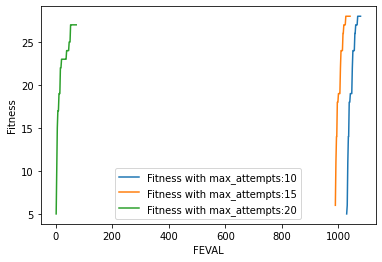

In [7]:
for i in range(3):
  temp_df = fitness_curve_df.iloc[:,i*2:i*2+2]
  temp_df = temp_df.dropna()
  print(temp_df)
  plt.plot(temp_df.iloc[:,1],temp_df.iloc[:,0],label='Fitness with max_attempts:'+str(5*(i+2)))
  #plt.plot(learningrate['Test Set Size %'],learningrate['Training Score'],label='Training Score')
plt.ylabel('Fitness')
plt.xlabel("FEVAL")
plt.legend()

In [10]:
fitness_curve_df = pd.DataFrame()
i = 4
while i < 65:
  PROBLEM_SIZE = i
  problem = ml.DiscreteOpt(PROBLEM_SIZE,cust_fit,maximize=True,max_val=PROBLEM_SIZE)
  schedule = ml.ExpDecay()
  init_state = np.arange(0,PROBLEM_SIZE)
  %time best_state, best_fitness, fitness_curve = ml.random_hill_climb(problem,max_attempts=15,max_iters=300,restarts=30,init_state=init_state,curve=True,random_state=12)
  
  temp_df = pd.DataFrame(fitness_curve)
  temp_df = temp_df.rename({0: "Score"+str(i), 1: "Fevals"+str(i)}, axis='columns')
  
  fitness_curve_df = pd.concat([fitness_curve_df,temp_df])
  
  i = i*2

CPU times: user 25.5 ms, sys: 0 ns, total: 25.5 ms
Wall time: 27.1 ms
CPU times: user 113 ms, sys: 2.05 ms, total: 115 ms
Wall time: 112 ms
CPU times: user 519 ms, sys: 3.04 ms, total: 522 ms
Wall time: 520 ms
CPU times: user 3.53 s, sys: 12.9 ms, total: 3.54 s
Wall time: 3.54 s
CPU times: user 26.7 s, sys: 11.5 ms, total: 26.8 s
Wall time: 26.8 s


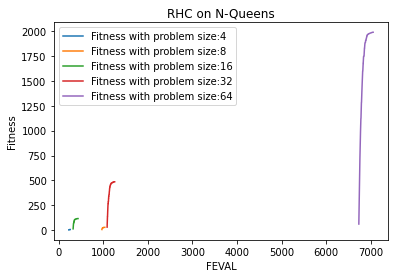

In [12]:
import matplotlib.pyplot as plt

count = 4
for i in range(5):
  temp_df = fitness_curve_df.iloc[:,i*2:i*2+2]
  temp_df = temp_df.dropna()
  #print(temp_df)
  
  plt.plot(temp_df.iloc[:,1],temp_df.iloc[:,0],label='Fitness with problem size:'+str(count))
  #plt.plot(learningrate['Test Set Size %'],learningrate['Training Score'],label='Training Score')
  count = count *2
plt.ylabel('Fitness')
plt.xlabel("FEVAL")
plt.title('RHC on N-Queens')
plt.legend()

In [ ]:
hp tuning, SA 8 queens: schedules

In [ ]:
fitness_curve_df = pd.DataFrame()
i = 30
while i < 51:
  PROBLEM_SIZE = 8
  problem = ml.DiscreteOpt(PROBLEM_SIZE,cust_fit,maximize=True,max_val=PROBLEM_SIZE)
  schedule = ml.GeomDecay()
  
  init_state = np.arange(0,PROBLEM_SIZE)
  %time best_state, best_fitness, fitness_curve = ml.simulated_annealing(problem,schedule=schedule,max_attempts=i,max_iters=1000,init_state=init_state,curve=True,random_state=5,fevals=True)
  temp_df = pd.DataFrame(fitness_curve)
  temp_df = temp_df.rename({0: "Score"+str(i), 1: "Fevals"+str(i)}, axis='columns')
  
  fitness_curve_df = pd.concat([fitness_curve_df,temp_df])
  
  i = i+10

CPU times: user 43.9 ms, sys: 1.02 ms, total: 44.9 ms
Wall time: 41.2 ms
CPU times: user 36 ms, sys: 1.03 ms, total: 37 ms
Wall time: 35.6 ms
CPU times: user 63.7 ms, sys: 7 µs, total: 63.7 ms
Wall time: 64.7 ms


     Score30  Fevals30
0        5.0       3.0
1       10.0       5.0
2       15.0       7.0
3       17.0       9.0
4       17.0      11.0
..       ...       ...
272     27.0     339.0
273     27.0     340.0
274     27.0     341.0
275     27.0     342.0
276     27.0     343.0

[277 rows x 2 columns]
     Score40  Fevals40
0        5.0       3.0
1       10.0       5.0
2       15.0       7.0
3       17.0       9.0
4       17.0      11.0
..       ...       ...
282     27.0     349.0
283     27.0     350.0
284     27.0     351.0
285     27.0     352.0
286     27.0     353.0

[287 rows x 2 columns]
     Score50  Fevals50
0        5.0       3.0
1       10.0       5.0
2       15.0       7.0
3       17.0       9.0
4       17.0      11.0
..       ...       ...
741     28.0     842.0
742     28.0     843.0
743     28.0     844.0
744     28.0     845.0
745     28.0     846.0

[746 rows x 2 columns]


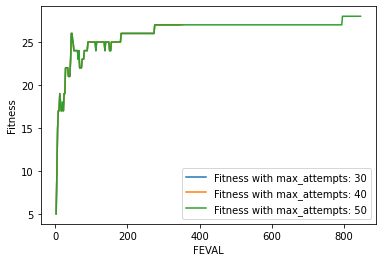

In [ ]:
for i in range(3):
  temp_df = fitness_curve_df.iloc[:,i*2:i*2+2]
  temp_df = temp_df.dropna()
  print(temp_df)
  
  plt.plot(temp_df.iloc[:,1],temp_df.iloc[:,0],label='Fitness with max_attempts: ' + str((i*10)+30))
  
  #plt.plot(learningrate['Test Set Size %'],learningrate['Training Score'],label='Training Score')
plt.ylabel('Fitness')
plt.xlabel("FEVAL")
plt.legend()

In [15]:
import matplotlib.pyplot as plt
fitness_curve_df = pd.DataFrame()
i = 4
while i < 65:
  PROBLEM_SIZE = i
  problem = ml.DiscreteOpt(PROBLEM_SIZE,cust_fit,maximize=True,max_val=PROBLEM_SIZE)
  schedule = ml.GeomDecay()
  init_state = np.arange(0,PROBLEM_SIZE)
  %time best_state, best_fitness, fitness_curve = ml.simulated_annealing(problem,schedule=schedule,max_attempts=50,max_iters=1000,init_state=init_state,curve=True,random_state=12,fevals=True)
  temp_df = pd.DataFrame(fitness_curve)
  temp_df = temp_df.rename({0: "Score"+str(i), 1: "Fevals"+str(i)}, axis='columns')
  
  fitness_curve_df = pd.concat([fitness_curve_df,temp_df])
  
  i = i*2
  

CPU times: user 15.1 ms, sys: 2 µs, total: 15.1 ms
Wall time: 17.3 ms
CPU times: user 23.2 ms, sys: 4 µs, total: 23.2 ms
Wall time: 23.4 ms
CPU times: user 55.3 ms, sys: 4 µs, total: 55.3 ms
Wall time: 55.2 ms
CPU times: user 440 ms, sys: 811 µs, total: 441 ms
Wall time: 445 ms
CPU times: user 3.85 s, sys: 1.98 ms, total: 3.85 s
Wall time: 3.87 s


     Score4  Fevals4
0       2.0      3.0
1       2.0      5.0
2       2.0      7.0
3       2.0      9.0
4       3.0     11.0
..      ...      ...
244     6.0    301.0
245     6.0    302.0
246     6.0    303.0
247     6.0    304.0
248     6.0    305.0

[249 rows x 2 columns]
     Score8  Fevals8
0       6.0      3.0
1      11.0      5.0
2      15.0      7.0
3      15.0      8.0
4      15.0     10.0
..      ...      ...
204    27.0    264.0
205    27.0    265.0
206    27.0    266.0
207    27.0    267.0
208    27.0    268.0

[209 rows x 2 columns]
     Score16  Fevals16
0       14.0       3.0
1       26.0       5.0
2       37.0       7.0
3       48.0       9.0
4       59.0      11.0
..       ...       ...
183    117.0     229.0
184    117.0     230.0
185    117.0     231.0
186    117.0     232.0
187    117.0     233.0

[188 rows x 2 columns]
     Score32  Fevals32
0       30.0       3.0
1       58.0       5.0
2       86.0       7.0
3      113.0       9.0
4      140.0      11.0
..       .

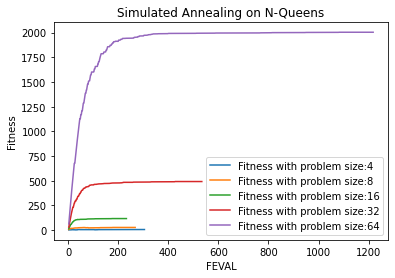

In [17]:
count = 4
for i in range(5):
  temp_df = fitness_curve_df.iloc[:,i*2:i*2+2]
  temp_df = temp_df.dropna()
  print(temp_df)
  
  plt.plot(temp_df.iloc[:,1],temp_df.iloc[:,0],label='Fitness with problem size:'+str(count))
  #plt.plot(learningrate['Test Set Size %'],learningrate['Training Score'],label='Training Score')
  count = count *2
plt.ylabel('Fitness')
plt.xlabel("FEVAL")
plt.title('Simulated Annealing on N-Queens')
plt.legend()


GA HP Tuning, pop size 100-500, by 100s. 400 sweet spot between hitting max score and number of fevals to get there.

In [ ]:
fitness_curve_df = pd.DataFrame()
i = 100
while i < 501:
  PROBLEM_SIZE = 8
  problem = ml.DiscreteOpt(PROBLEM_SIZE,cust_fit,maximize=True,max_val=PROBLEM_SIZE)
  schedule = ml.ExpDecay()
  init_state = np.arange(0,PROBLEM_SIZE)
  %time best_state, best_fitness, fitness_curve = ml.genetic_alg(problem,pop_size=i,max_attempts=10,curve=True,random_state=5)
  temp_df = pd.DataFrame(fitness_curve)
  temp_df = temp_df.rename({0: "Score"+str(i), 1: "Fevals"+str(i)}, axis='columns')
  
  fitness_curve_df = pd.concat([fitness_curve_df,temp_df])
  
  i = i+100

CPU times: user 125 ms, sys: 997 µs, total: 126 ms
Wall time: 126 ms
CPU times: user 248 ms, sys: 0 ns, total: 248 ms
Wall time: 248 ms
CPU times: user 561 ms, sys: 994 µs, total: 562 ms
Wall time: 569 ms
CPU times: user 866 ms, sys: 8.06 ms, total: 874 ms
Wall time: 867 ms
CPU times: user 1.24 s, sys: 76 µs, total: 1.24 s
Wall time: 1.24 s


    Score100  Fevals100
0       26.0      202.0
1       26.0      303.0
2       26.0      404.0
3       26.0      505.0
4       26.0      606.0
5       26.0      707.0
6       26.0      808.0
7       26.0      909.0
8       26.0     1010.0
9       26.0     1111.0
10      26.0     1212.0
    Score200  Fevals200
0       26.0      402.0
1       26.0      603.0
2       26.0      804.0
3       26.0     1005.0
4       26.0     1206.0
5       26.0     1407.0
6       26.0     1608.0
7       26.0     1809.0
8       26.0     2010.0
9       26.0     2211.0
10      26.0     2412.0
    Score300  Fevals300
0       26.0      602.0
1       26.0      903.0
2       26.0     1204.0
3       26.0     1505.0
4       26.0     1806.0
5       27.0     2108.0
6       27.0     2409.0
7       27.0     2710.0
8       27.0     3011.0
9       27.0     3312.0
10      27.0     3613.0
11      27.0     3914.0
12      27.0     4215.0
13      27.0     4516.0
14      27.0     4817.0
15      27.0     5118.0
    Score400  Fe

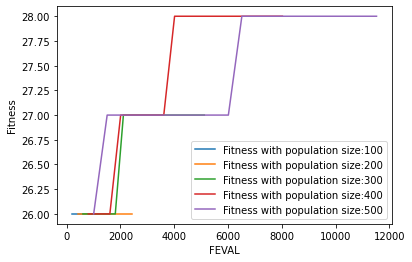

In [ ]:

for i in range(5):
  temp_df = fitness_curve_df.iloc[:,i*2:i*2+2]
  temp_df = temp_df.dropna()
  print(temp_df)
  
  plt.plot(temp_df.iloc[:,1],temp_df.iloc[:,0],label='Fitness with population size:'+str(100+(i*100)))
  #plt.plot(learningrate['Test Set Size %'],learningrate['Training Score'],label='Training Score')
  count = count *2
plt.ylabel('Fitness')
plt.xlabel("FEVAL")
plt.legend()

In [18]:
fitness_curve_df = pd.DataFrame()
i = 4
while i < 65:
  PROBLEM_SIZE = i
  problem = ml.DiscreteOpt(PROBLEM_SIZE,cust_fit,maximize=True,max_val=PROBLEM_SIZE)
  schedule = ml.ExpDecay()
  init_state = np.arange(0,PROBLEM_SIZE)
  %time best_state, best_fitness, fitness_curve = ml.genetic_alg(problem,pop_size=400,max_attempts=10,curve=True,random_state=12)
  temp_df = pd.DataFrame(fitness_curve)
  temp_df = temp_df.rename({0: "Score"+str(i), 1: "Fevals"+str(i)}, axis='columns')
  
  fitness_curve_df = pd.concat([fitness_curve_df,temp_df])
  
  i = i*2

CPU times: user 467 ms, sys: 0 ns, total: 467 ms
Wall time: 467 ms
CPU times: user 772 ms, sys: 3.1 ms, total: 775 ms
Wall time: 763 ms
CPU times: user 2.02 s, sys: 8.07 ms, total: 2.03 s
Wall time: 2.02 s
CPU times: user 10.3 s, sys: 6.84 ms, total: 10.3 s
Wall time: 10.3 s
CPU times: user 17 s, sys: 7.91 ms, total: 17 s
Wall time: 17 s


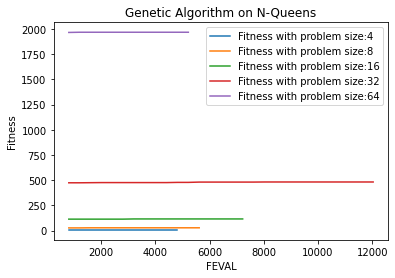

In [19]:
for i in range(5):
  temp_df = fitness_curve_df.iloc[:,i*2:i*2+2]
  temp_df = temp_df.dropna()
  #print(temp_df)
  plt.plot(temp_df.iloc[:,1],temp_df.iloc[:,0],label='Fitness with problem size:'+str(2**(i+2)))
  #plt.plot(learningrate['Test Set Size %'],learningrate['Training Score'],label='Training Score')
plt.ylabel('Fitness')
plt.xlabel("FEVAL")
plt.title('Genetic Algorithm on N-Queens')
plt.legend()

HP TUning MIMIC, 8 queens: 

In [ ]:
fitness_curve_df = pd.DataFrame()
i = 1
while i < 6:
  PROBLEM_SIZE = 8
  problem = ml.DiscreteOpt(PROBLEM_SIZE,cust_fit,maximize=True,max_val=PROBLEM_SIZE)
  schedule = ml.ExpDecay()
  init_state = np.arange(0,PROBLEM_SIZE)
  %time best_state, best_fitness, fitness_curve = ml.mimic(problem,pop_size=200,keep_pct=i/10,max_attempts=15,curve=True,random_state=5)
  temp_df = pd.DataFrame(fitness_curve)
  temp_df = temp_df.rename({0: "Score"+str(i), 1: "Fevals"+str(i)}, axis='columns')
  
  fitness_curve_df = pd.concat([fitness_curve_df,temp_df])
  
  i = i+1

CPU times: user 993 ms, sys: 5 ms, total: 998 ms
Wall time: 997 ms
CPU times: user 706 ms, sys: 978 µs, total: 707 ms
Wall time: 711 ms
CPU times: user 727 ms, sys: 3.03 ms, total: 730 ms
Wall time: 727 ms
CPU times: user 1.02 s, sys: 986 µs, total: 1.02 s
Wall time: 1.02 s
CPU times: user 927 ms, sys: 1.98 ms, total: 929 ms
Wall time: 930 ms


    Score1  Fevals1
0     25.0    402.0
1     26.0    604.0
2     27.0    806.0
3     27.0   1007.0
4     27.0   1208.0
5     27.0   1409.0
6     27.0   1610.0
7     27.0   1811.0
8     27.0   2012.0
9     27.0   2213.0
10    27.0   2414.0
11    27.0   2615.0
12    27.0   2816.0
13    27.0   3017.0
14    27.0   3218.0
15    27.0   3419.0
16    27.0   3620.0
17    27.0   3821.0
    Score2  Fevals2
0     27.0    402.0
1     27.0    603.0
2     27.0    804.0
3     27.0   1005.0
4     27.0   1206.0
5     27.0   1407.0
6     27.0   1608.0
7     27.0   1809.0
8     27.0   2010.0
9     27.0   2211.0
10    27.0   2412.0
11    27.0   2613.0
12    27.0   2814.0
13    27.0   3015.0
14    27.0   3216.0
15    27.0   3417.0
    Score3  Fevals3
0     27.0    402.0
1     27.0    603.0
2     27.0    804.0
3     27.0   1005.0
4     27.0   1206.0
5     27.0   1407.0
6     27.0   1608.0
7     27.0   1809.0
8     27.0   2010.0
9     27.0   2211.0
10    27.0   2412.0
11    27.0   2613.0
12    27.0   2814.0


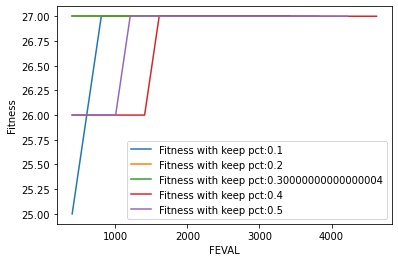

In [ ]:
for i in range(5):
  temp_df = fitness_curve_df.iloc[:,i*2:i*2+2]
  temp_df = temp_df.dropna()
  print(temp_df)
  
  plt.plot(temp_df.iloc[:,1],temp_df.iloc[:,0],label='Fitness with keep pct:'+str(.1+(i/10)))
  #plt.plot(learningrate['Test Set Size %'],learningrate['Training Score'],label='Training Score')
plt.ylabel('Fitness')
plt.xlabel("FEVAL")
plt.legend()

In [20]:
fitness_curve_df = pd.DataFrame()
i = 4
while i < 65:
  PROBLEM_SIZE = i
  problem = ml.DiscreteOpt(PROBLEM_SIZE,cust_fit,maximize=True,max_val=PROBLEM_SIZE)
  schedule = ml.ExpDecay()
  init_state = np.arange(0,PROBLEM_SIZE)
  %time best_state, best_fitness, fitness_curve = ml.mimic(problem,pop_size=200,keep_pct=0.3,max_attempts=15,curve=True,random_state=12)
  temp_df = pd.DataFrame(fitness_curve)
  temp_df = temp_df.rename({0: "Score"+str(i), 1: "Fevals"+str(i)}, axis='columns')
  
  fitness_curve_df = pd.concat([fitness_curve_df,temp_df])
  
  i = i*2

CPU times: user 256 ms, sys: 3.01 ms, total: 259 ms
Wall time: 272 ms
CPU times: user 945 ms, sys: 4.02 ms, total: 949 ms
Wall time: 948 ms
CPU times: user 4.27 s, sys: 9.68 ms, total: 4.28 s
Wall time: 4.29 s
CPU times: user 21.1 s, sys: 5.87 ms, total: 21.1 s
Wall time: 21.2 s
CPU times: user 1min 18s, sys: 32.7 ms, total: 1min 18s
Wall time: 1min 18s


    Score4  Fevals4
0      6.0    402.0
1      6.0    603.0
2      6.0    804.0
3      6.0   1005.0
4      6.0   1206.0
5      6.0   1407.0
6      6.0   1608.0
7      6.0   1809.0
8      6.0   2010.0
9      6.0   2211.0
10     6.0   2412.0
11     6.0   2613.0
12     6.0   2814.0
13     6.0   3015.0
14     6.0   3216.0
15     6.0   3417.0
    Score8  Fevals8
0     27.0    402.0
1     27.0    603.0
2     27.0    804.0
3     27.0   1005.0
4     27.0   1206.0
5     27.0   1407.0
6     27.0   1608.0
7     27.0   1809.0
8     27.0   2010.0
9     27.0   2211.0
10    27.0   2412.0
11    27.0   2613.0
12    27.0   2814.0
13    27.0   3015.0
14    27.0   3216.0
15    27.0   3417.0
    Score16  Fevals16
0     113.0     402.0
1     113.0     603.0
2     114.0     805.0
3     115.0    1007.0
4     115.0    1208.0
5     115.0    1409.0
6     115.0    1610.0
7     115.0    1811.0
8     115.0    2012.0
9     115.0    2213.0
10    115.0    2414.0
11    115.0    2615.0
12    115.0    2816.0
13    115.0 

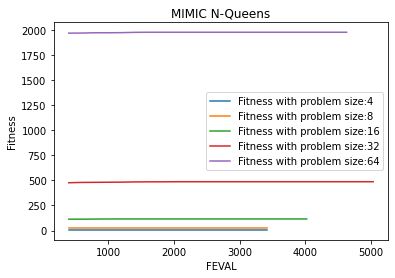

In [21]:
for i in range(5):
  temp_df = fitness_curve_df.iloc[:,i*2:i*2+2]
  temp_df = temp_df.dropna()
  print(temp_df)
  plt.plot(temp_df.iloc[:,1],temp_df.iloc[:,0],label='Fitness with problem size:'+str(2**(i+2)))
  #plt.plot(learningrate['Test Set Size %'],learningrate['Training Score'],label='Training Score')
plt.ylabel('Fitness')
plt.xlabel("FEVAL")
plt.title("MIMIC N-Queens")
plt.legend()